In [50]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

In [5]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [137]:
temperature = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
temperature.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### String manipulation

In [2]:
'aBc'.upper()

'ABC'

In [11]:
'  aB c  '.strip()

'aB c'

In [8]:
iris.Species.str.upper().head()

1    SETOSA
2    SETOSA
3    SETOSA
4    SETOSA
5    SETOSA
Name: Species, dtype: object

In [9]:
iris.Species.str.lower().head()

1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
Name: Species, dtype: object

In [12]:
iris.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
iris.Species.str.len().min()

6

In [15]:
iris['Species_abbr'] = iris['Species_abbr'].str.replace('v','V')
iris['Species_abbr'].unique()

array(['seto', 'Vers', 'Virg'], dtype=object)

In [19]:
iris.loc[iris['Species_abbr'].str.contains('Vi|se'), 'Species_abbr'].unique()

array(['seto', 'Virg'], dtype=object)

### Mapping

In [14]:
iris['Species_abbr'] = iris['Species'].replace({'setosa':'seto', 'versicolor':'vers', 'virginica':'virg'})
iris['Species_abbr'].unique()

array(['seto', 'vers', 'virg'], dtype=object)

In [24]:
cutoff = [0,5,6,np.inf]
names = ['small', 'medium', 'large']
iris['sepal_length_cat'] = pd.cut(iris['Sepal.Length'], bins = cutoff, labels = names)
iris.groupby('sepal_length_cat')['Sepal.Length'].mean()

sepal_length_cat
small     4.787500
medium    5.550877
large     6.670492
Name: Sepal.Length, dtype: float64

### Handle timestamps

In [85]:
import datetime as dt
import time
from dateutil import tz

In [147]:
# Basic
print(dt.date.today())
print(dt.datetime.today())
print(time.asctime())
print(dt.date(2020,11,1))

2020-11-10
2020-11-10 18:28:47.130469
Tue Nov 10 18:28:47 2020
2020-11-01


In [74]:
# Conversion

# Datetime to custom format
today = dt.date.today()
print(today.strftime('%Y-%m-%d'))
print(today.isoformat())

# Custom format to datetime
s = '2020-10-10 08:08:00'
fmt = '%Y-%m-%d %H:%M:%S'
d = dt.datetime.strptime(s, fmt)
print(d)

# Datetime to number
n = today.toordinal()
print(n)

# Number to datetime
print(dt.date.fromordinal(n))

2020-11-03
2020-11-03
2020-10-10 08:08:00
737732
2020-11-03


In [70]:
# Calculation
tomorrow = today + dt.timedelta(1)
print(tomorrow - today)
print((tomorrow - today).total_seconds())
print(today.replace(year = 2021))

1 day, 0:00:00
86400.0
2021-11-03


In [108]:
# UTC offsets
d = dt.datetime(2020, 1, 1, tzinfo = dt.timezone.utc)
print(d.isoformat())

pst = dt.timezone(dt.timedelta(hours = -8))
d = dt.datetime(2020, 3, 8, 1, tzinfo = pst)
print(d.isoformat())

et = tz.gettz('America/New_York')
d = d.replace(tzinfo = et)
print(d.isoformat())

# EST to EDT
d2 = d + dt.timedelta(hours = 2)
print(d2.isoformat())

print((d2 - d).total_seconds())
print((d2.astimezone(dt.timezone.utc) - d.astimezone(dt.timezone.utc)).total_seconds())


2020-01-01T00:00:00+00:00
2020-03-08T01:00:00-08:00
2020-03-08T01:00:00-05:00
2020-03-08T03:00:00-04:00
7200.0
3600.0


In [146]:
# Timestamp with pandas
temperature['datetime_est'] = pd.to_datetime(temperature['Date']).dt.tz_localize('America/New_York', ambiguous='NaT')
temperature['datetime_utc'] = temperature['datetime_est'].dt.tz_convert('Europe/London')
temperature['weekday'] = temperature['datetime_est'].dt.weekday_name
temperature.head()

,Date,Temp,datetime_est,datetime_utc,weekday
0,1981-01-01,20.7,1981-01-01 00:00:00-05:00,1981-01-01 05:00:00+00:00,Thursday
1,1981-01-02,17.9,1981-01-02 00:00:00-05:00,1981-01-02 05:00:00+00:00,Friday
2,1981-01-03,18.8,1981-01-03 00:00:00-05:00,1981-01-03 05:00:00+00:00,Saturday
3,1981-01-04,14.6,1981-01-04 00:00:00-05:00,1981-01-04 05:00:00+00:00,Sunday
4,1981-01-05,15.8,1981-01-05 00:00:00-05:00,1981-01-05 05:00:00+00:00,Monday


### Missing data

In [42]:
import missingno as msno

In [46]:
airquality = data('airquality')

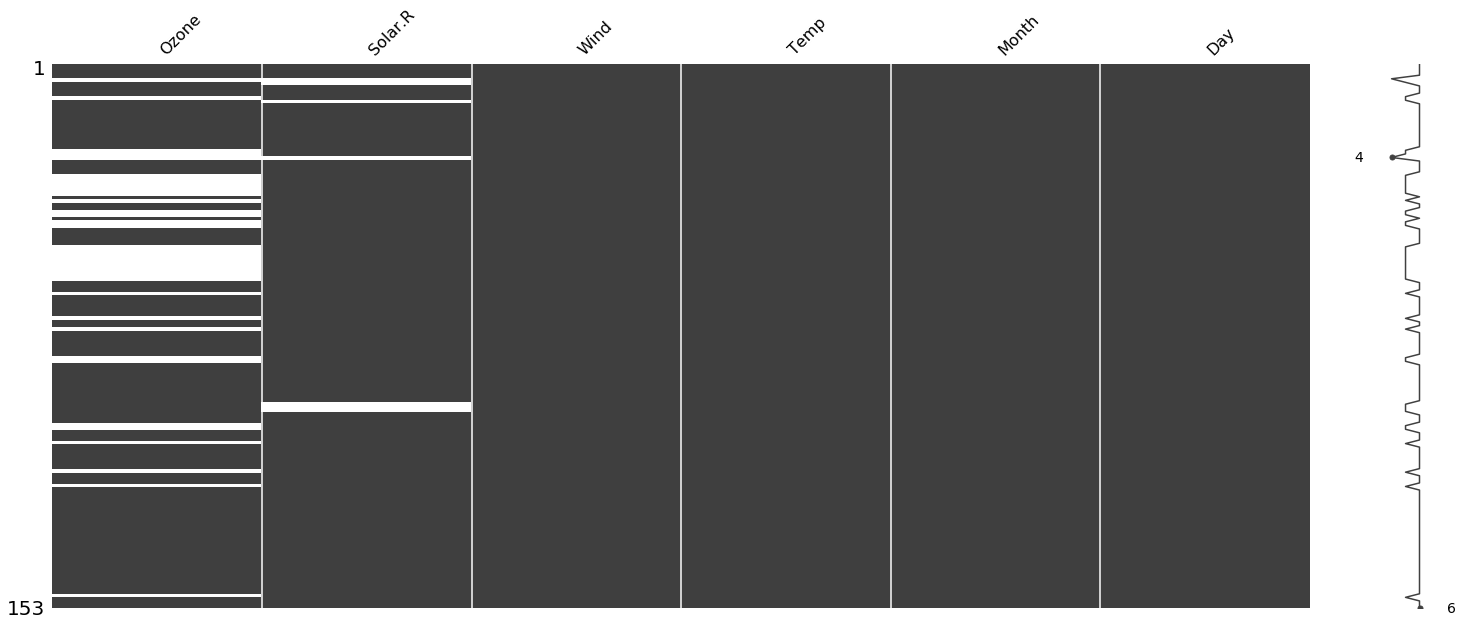

In [51]:
msno.matrix(airquality)
plt.show()

In [52]:
missing = airquality[airquality['Ozone'].isna()]
complete = airquality[~airquality['Ozone'].isna()]

In [53]:
missing.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,0.0,35.000000,37.000000,37.000000,37.000000,37.000000
mean,NaN,189.514286,10.256757,77.918919,6.351351,16.648649
std,NaN,87.694782,3.385142,9.531755,0.977986,9.286239
min,NaN,31.000000,1.700000,56.000000,5.000000,1.000000
25%,NaN,131.000000,8.000000,75.000000,6.000000,10.000000
50%,NaN,194.000000,9.700000,79.000000,6.000000,15.000000
75%,NaN,261.500000,12.600000,84.000000,7.000000,25.000000
max,NaN,332.000000,16.600000,93.000000,9.000000,30.000000


In [54]:
complete.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,111.000000,116.000000,116.000000,116.000000,116.000000
mean,42.129310,184.801802,9.862069,77.870690,7.198276,15.534483
std,32.987885,91.152302,3.574856,9.485486,1.475715,8.750087
min,1.000000,7.000000,2.300000,57.000000,5.000000,1.000000
25%,18.000000,113.500000,7.400000,71.000000,6.000000,8.000000
50%,31.500000,207.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,255.500000,11.500000,85.000000,8.250000,22.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000
